In [3]:
import os
import pandas as pd
import numpy as np
from src.utilities.shape_utils import plot_mesh
from scipy.spatial import KDTree
import plotly.express as px
import trimesh

# Load test dataset that used Kikume NLS marker
root = "E:\\Nick\\Cole Trapnell's Lab Dropbox\\Nick Lammers\\Nick\\killi_tracker\\"
experiment_date = "20240611_NLS-Kikume_24hpf_side2"
config_name = "tracking_jordao_20240918.txt"
model ="LCP-Multiset-v1"
tracking_folder = config_name.replace(".txt", "")
tracking_folder = tracking_folder.replace(".toml", "")

well_num = 0
start_i = 0
stop_i = 1600

suffix = ""

# get path to metadata
metadata_path = os.path.join(root, "metadata", "tracking")

# set output path for tracking results
project_path = os.path.join(root, "tracking", experiment_date,  tracking_folder, f"well{well_num:04}" + suffix, "")
project_sub_path = os.path.join(project_path, f"track_{start_i:04}" + f"_{stop_i:04}" + suffix, "")

stats_df = pd.read_csv(project_sub_path + "evl_stats.csv")

figure_dir = os.path.join(project_sub_path,"figures","")

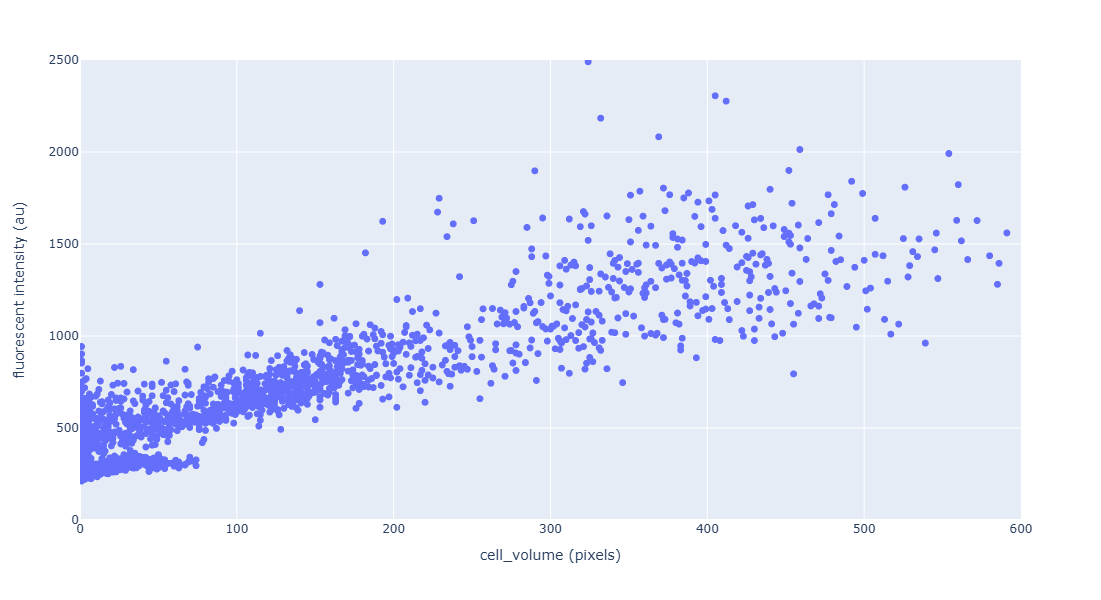

In [4]:
ft0 = stats_df["volume"] >= 260
ft1 = stats_df["fluo_mean"] >= 1100
ft2 = stats_df["volume"] < 50

evl_ft = ft0 | ft1

color_vec = np.zeros((stats_df.shape[0],))
color_vec[evl_ft] = 1
color_vec[ft2] = 2
color_vec = color_vec.astype(str)

fig = px.scatter(stats_df, x="volume", y="fluo_mean",# color=color_vec,  
                 labels={"volume":"cell_volume (pixels)", "fluo_mean":"fluorescent intensity (au)"})
fig.update_traces(marker=dict(size=7))
fig.update_layout(xaxis=dict(range=[0, 600]),
                  yaxis=dict(range=[0, 2500]))

fig.update_layout(
    height=600,  # Overall figure height
    width=600,  # Overall figure width
)
fig.show()
fig.write_image(figure_dir + "volume_seg_scatter.png", scale=2)